<a href="https://colab.research.google.com/github/Osanda-W/Telco_Customer_churn/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Churn Analysis**


In [97]:
pip install -q keras-tuner

ERROR: Operation cancelled by user


In [98]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, f1_score
from sklearn import tree


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


import keras_tuner as kt

import warnings
warnings.filterwarnings('ignore')



In [99]:
# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [100]:
# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
# Check shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (7043, 21)


In [102]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
# Check for missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [104]:
# Summary statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [105]:
# Get unique values
df.apply(lambda x: x.unique())

,0
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,"[Female, Male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"


In [106]:
# Drop rows with missing values
df = df.dropna()

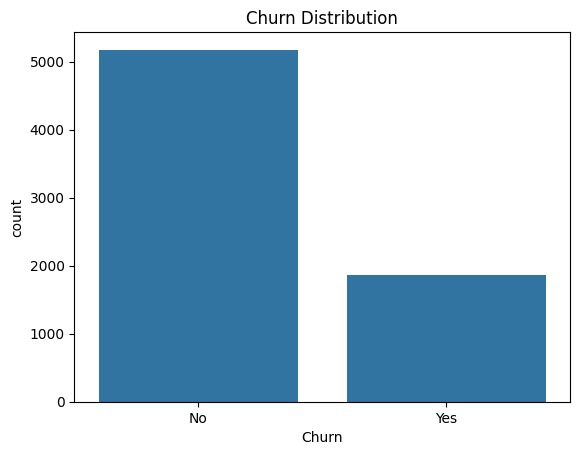

In [107]:
# Visualize churn distribution

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

**Numerical Features Analysis**

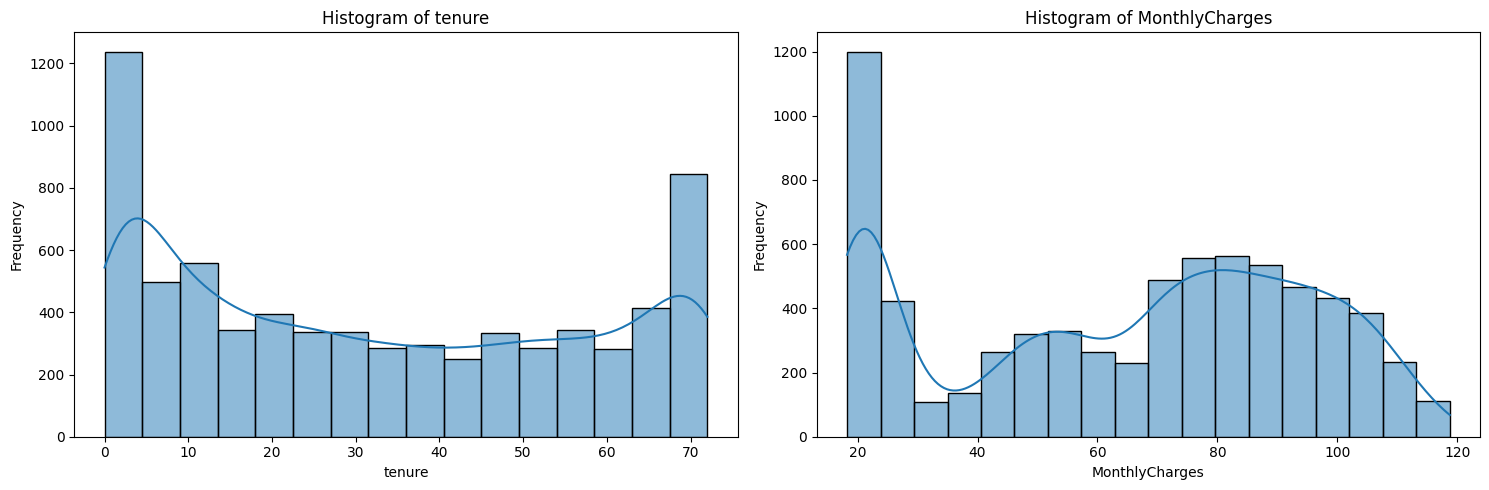

In [118]:
# Histograms for numerical features
num_features = ['tenure', 'MonthlyCharges']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Categorical Features Analysis**

In [110]:
cat_features = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

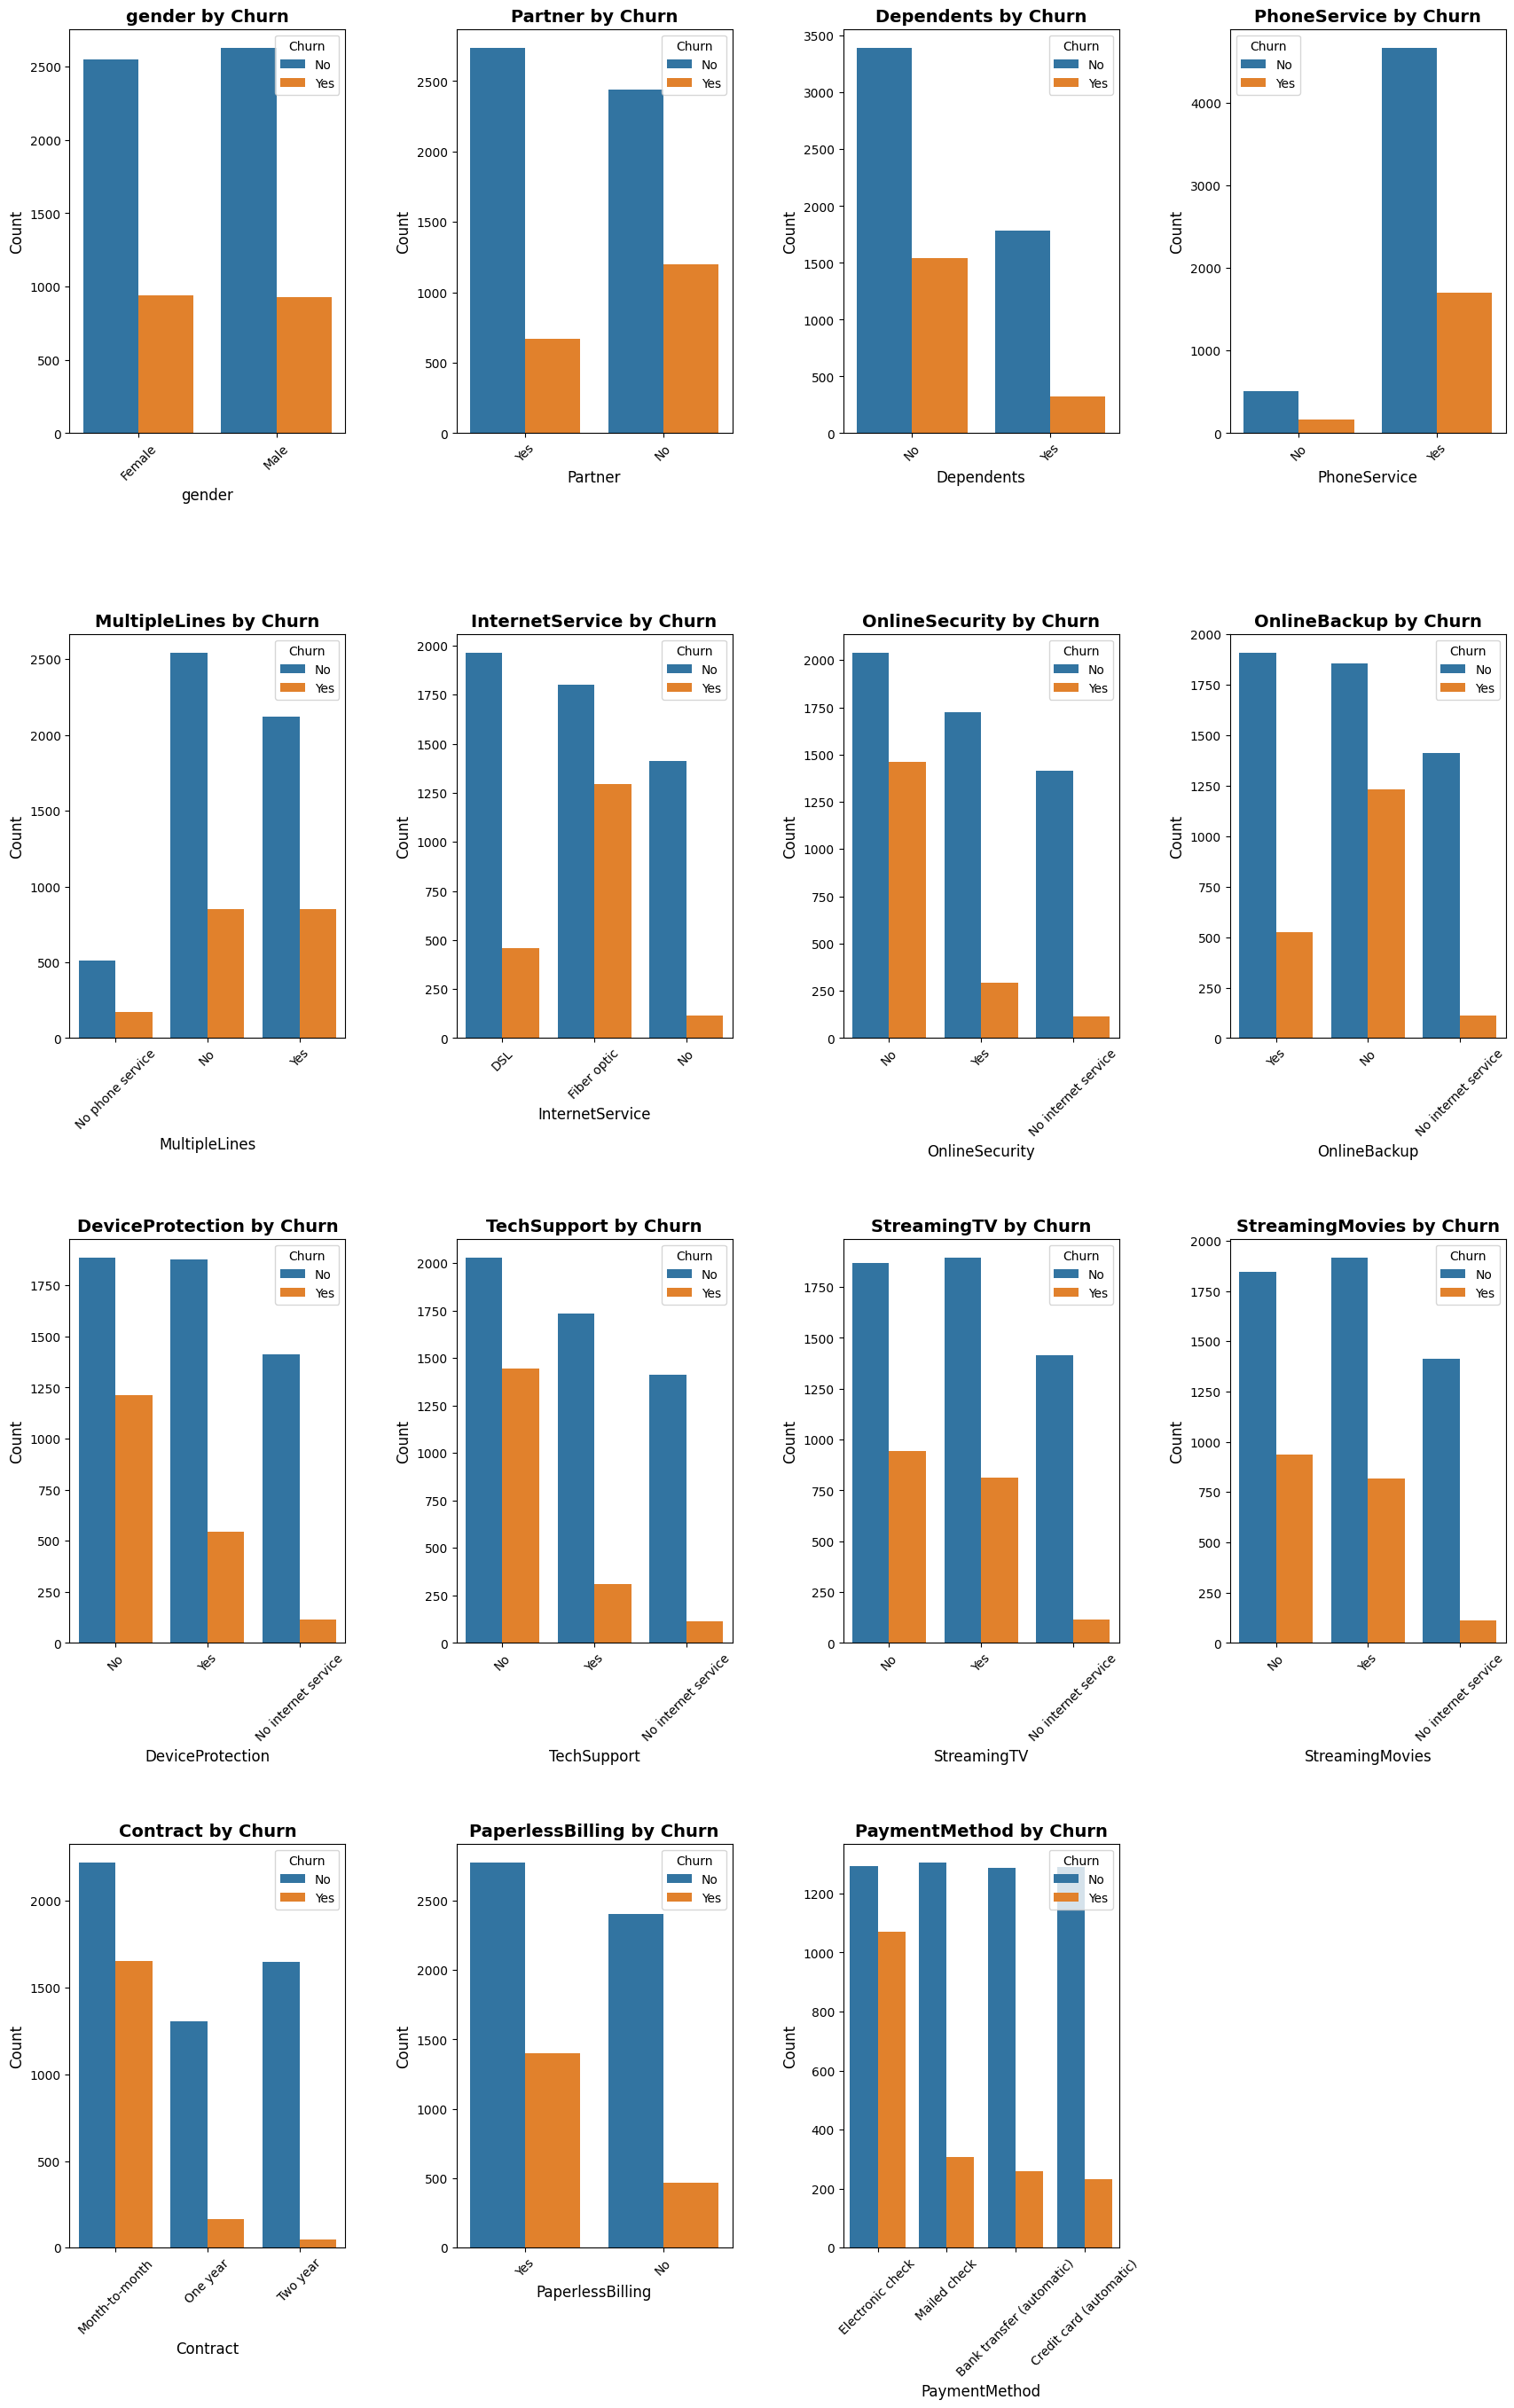

In [117]:
plt.figure(figsize=(18, 40))

for i, col in enumerate(cat_features, 1):
    plt.subplot(6, 4, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} by Churn', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Churn')

plt.tight_layout(pad=4.0)
plt.show()

**Boxplots for numerical features vs Churn**

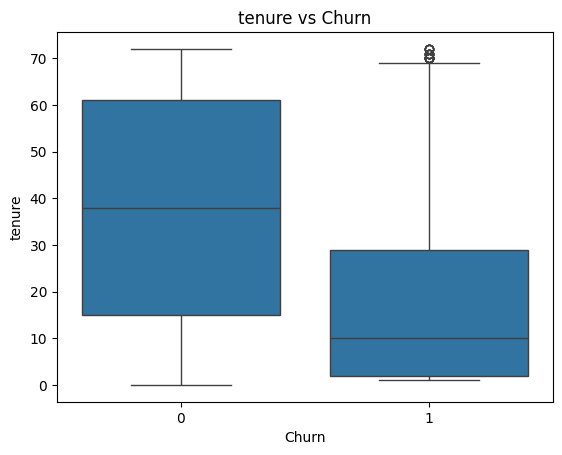

In [84]:
# Boxplots for numerical feature: tenure vs Churn
feature='tenure'

sns.boxplot(x='Churn', y=feature, data=df)
plt.title(f'{feature} vs Churn')
plt.show()

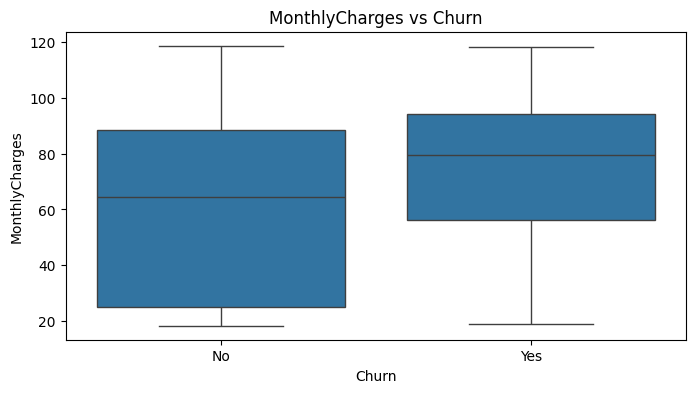

In [20]:
# Boxplots for numerical feature: MonthlyCharges vs Churn
feature='MonthlyCharges'

sns.boxplot(x='Churn', y=feature, data=df)
plt.title(f'{feature} vs Churn')
plt.show()

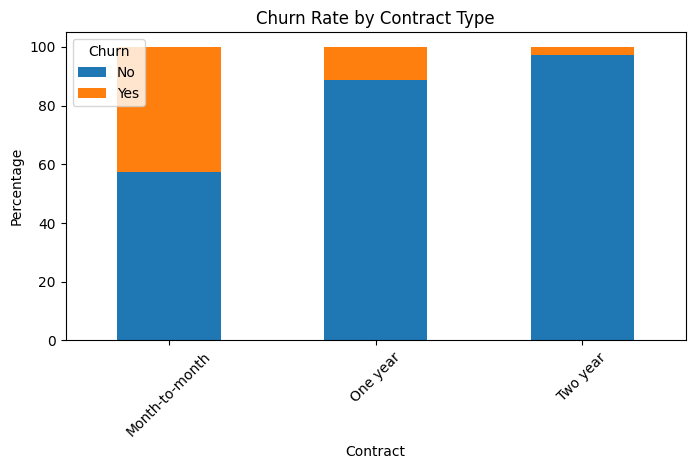

In [21]:
# Churn rate by Contract type (percentage)
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_contract.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


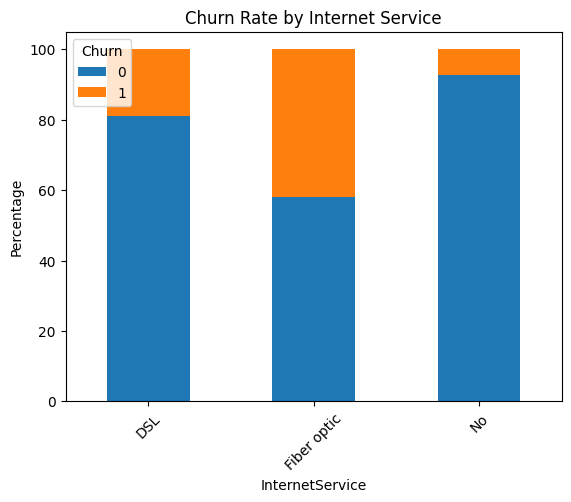

In [79]:
# Churn rate by InternetService
churn_by_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_internet.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

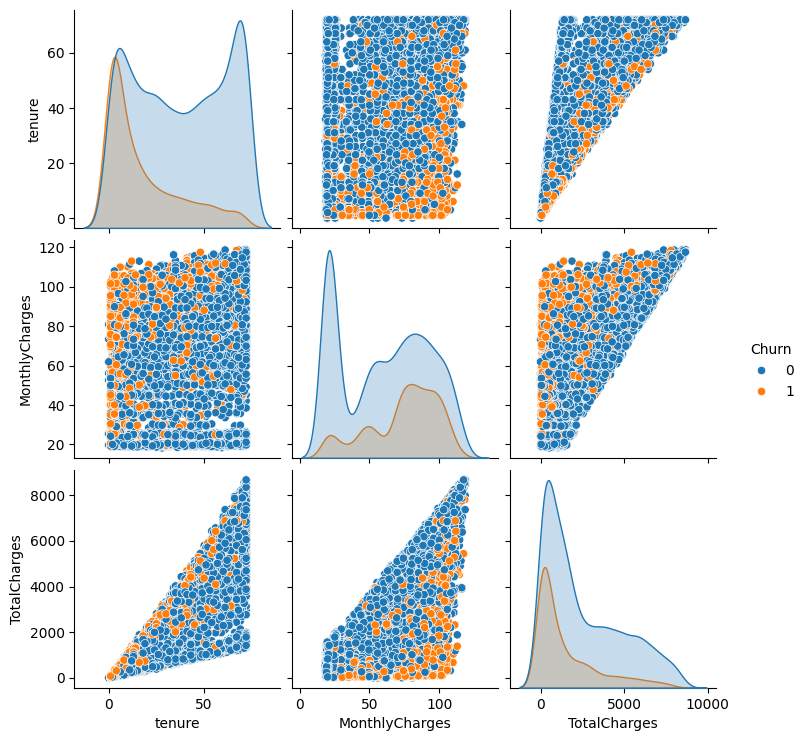

In [86]:
sns.pairplot(data=df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']],hue="Churn")

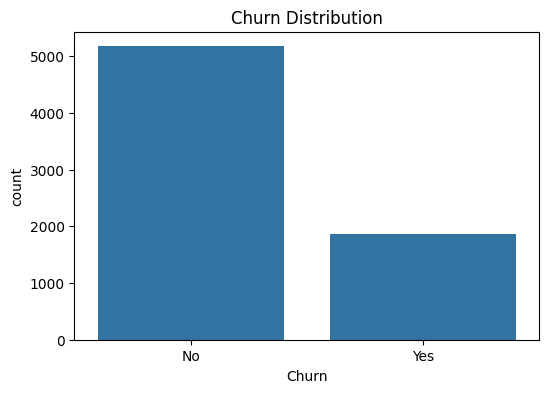

In [23]:
# Visualize churn distribution

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

<Axes: >

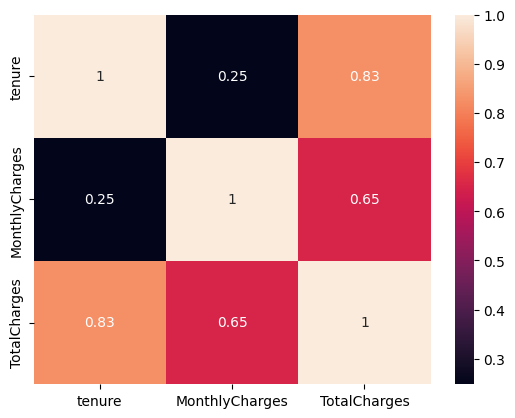

In [92]:
#Correlation Heatmap
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True)


# **Data Preprocessing**

In [24]:
# Convert TotalCharges to numeric
# 'TotalCharges' is object type but contains numbers. Force conversion.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [25]:
# Fill null values created by coercion with the mean
# df['TotalCharges'].fillna(0, inplace=True)
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [26]:
# Drop irrelevant column
df.drop(columns=['customerID'], inplace=True)

In [27]:
# Encoding Target Variable
# Convert 'Yes'/'No' to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [28]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


# **Feature Engineering & Encoding**

In [29]:
######
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [30]:
# One-Hot Encoding for categorical features (drop_first to avoid multicollinearity)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [31]:
df_encoded.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [32]:
# Splitting Data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# Scaling (Crucial for Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Features Shape: {X_train_scaled.shape}")
print(f"Testing Features Shape: {X_test_scaled.shape}")

Training Features Shape: (5634, 30)
Testing Features Shape: (1409, 30)


In [34]:
# Class weights (important for churn ~26.5% positive)
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}


In [35]:
# SMORT use for handle classs imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [36]:
X_train_res.shape

(8278, 30)

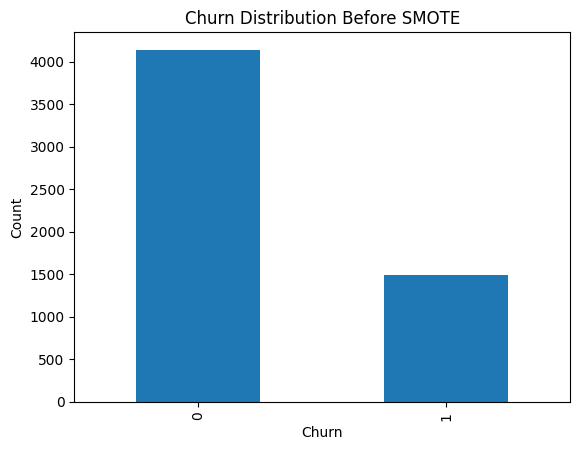

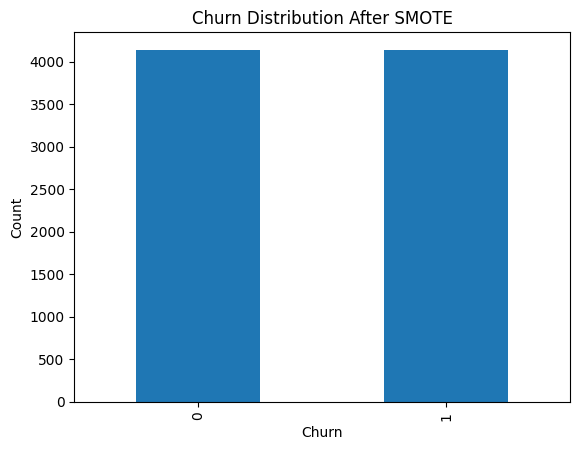

In [37]:
y_train.value_counts().plot(kind='bar')
plt.title("Churn Distribution Before SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

y_train_res.value_counts().plot(kind='bar')
plt.title("Churn Distribution After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

**Decision Tree Base**

In [38]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [39]:
prediction_test = dt.predict(X_test_scaled)
accuracy_score(y_test, prediction_test)

0.723207948899929

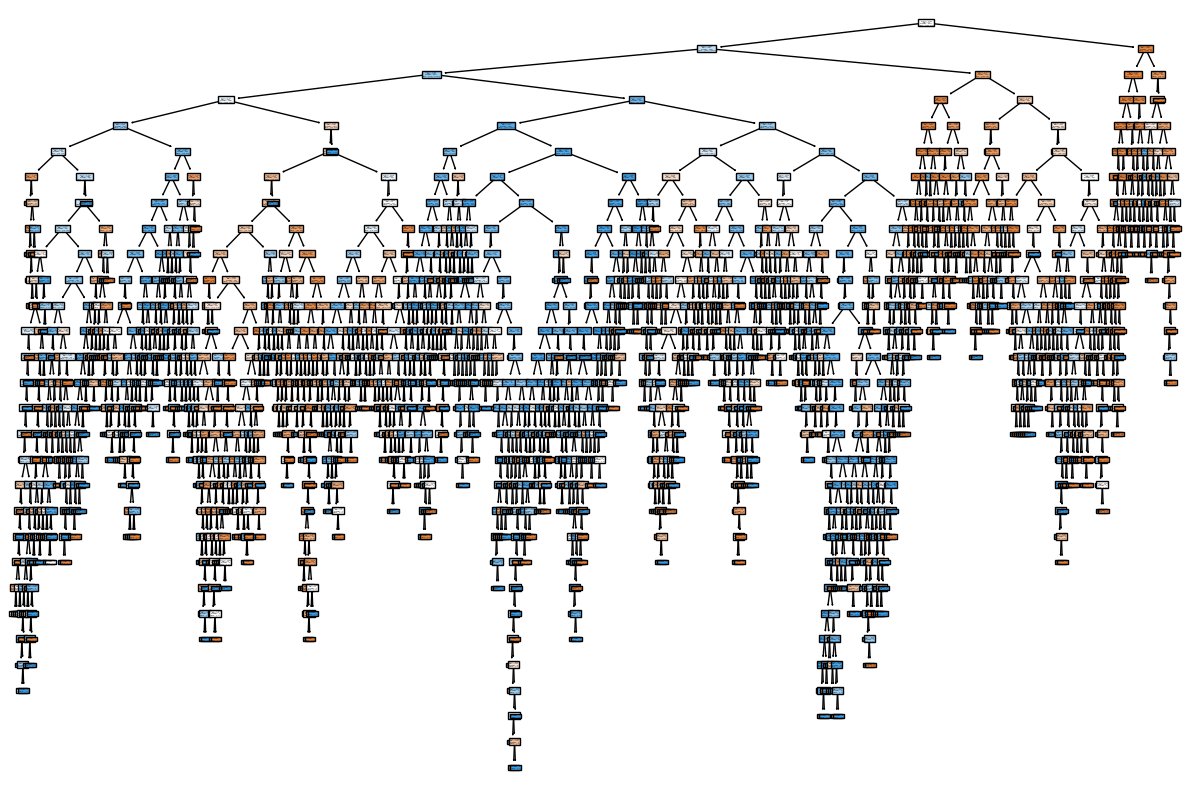

In [40]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

# **Decision Tree Model (with Hyperparameter Tuning)**

In [41]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, 12, None],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 20]
}


In [42]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)

# Get best model
best_dt_model = grid_search.best_estimator_

# Predictions
y_pred_dt = best_dt_model.predict(X_test_scaled)
y_prob_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]

print(f"Best Decision Tree Params: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [43]:
test_accuracy = best_dt_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7345635202271115


In [44]:
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Accuracy: 0.7991 (79.91%)


[Text(0.5, 0.875, 'Contract_Two year <= 0.605\nentropy = 0.835\nsamples = 5634\nvalue = [4139, 1495]'),
 Text(0.25, 0.625, 'Contract_One year <= 0.719\nentropy = 0.925\nsamples = 4275\nvalue = [2819, 1456]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'InternetService_Fiber optic <= 0.119\nentropy = 0.985\nsamples = 3102\nvalue = [1776, 1326]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'StreamingMovies_Yes <= 0.223\nentropy = 0.502\nsamples = 1173\nvalue = [1043, 130]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'MonthlyCharges <= 0.948\nentropy = 0.188\nsamples = 1359\nvalue = [1320, 39]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'MonthlyCharges <= 0.519\nentropy = 0.108\nsamples = 1056\nvalue = [1041, 15]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'TotalCharges <= 2.394\nentropy = 0.399\nsamples = 3

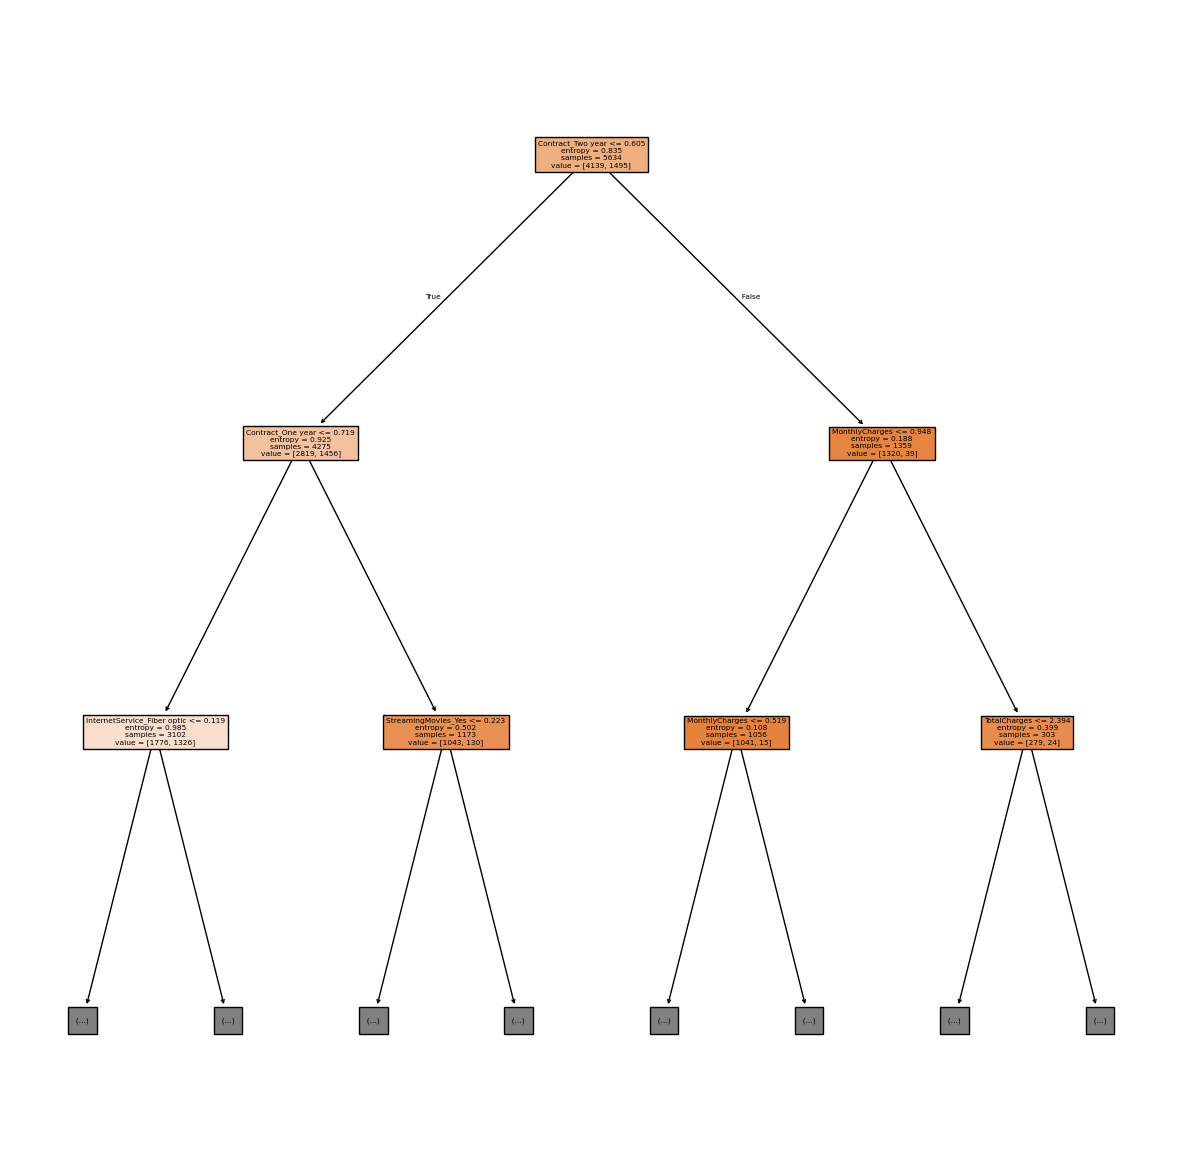

In [45]:
plt.figure(figsize = (15,15))
tree.plot_tree(best_dt_model, feature_names = list(X_train.columns), filled = True, max_depth = 2)

In [46]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} Results ---")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC-AUC Score: {auc:.4f} ({auc*100:.2f}%)")


    # Return metrics for table
    acc = accuracy_score(y_true, y_pred)
    return acc, auc

# Print Reports
acc_dt, auc_dt = evaluate_model("Decision Tree", y_test, y_pred_dt, y_prob_dt)

--- Decision Tree Results ---
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.63      0.58      0.61       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409

ROC-AUC Score: 0.8295 (82.95%)


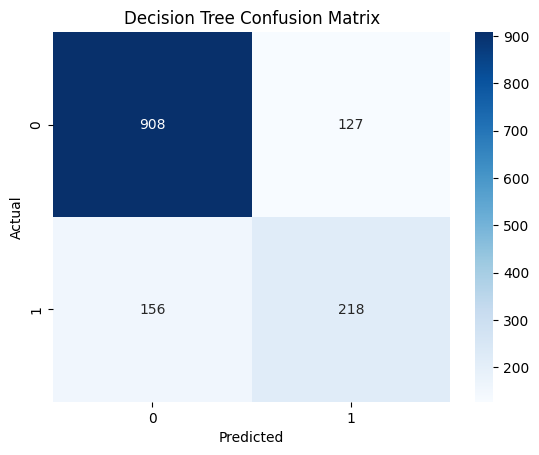

In [47]:
# Visualization: Decision Tree Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

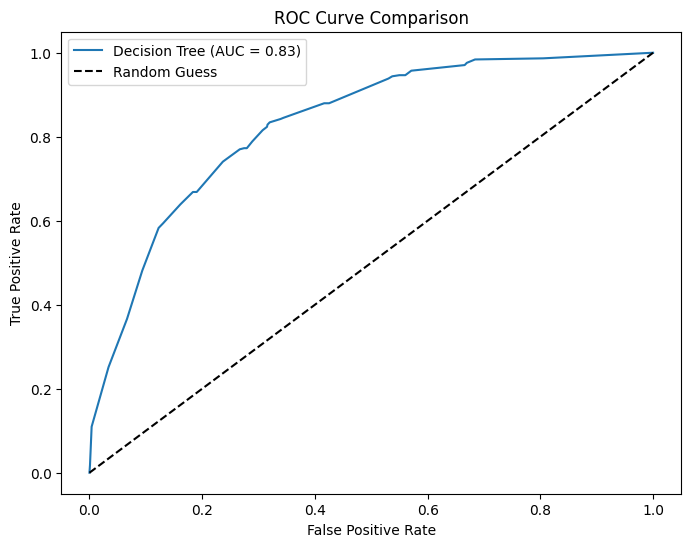

In [48]:
# Visualization: ROC Curve Comparison
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# **Neural Network Model**

In [49]:
# Define the Neural Network Architecture

# Input Layer + Hidden Layer 1
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dropout(0.2)) # Regularization

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

In [50]:
# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Train Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6671 - loss: 0.5805 - val_accuracy: 0.7906 - val_loss: 0.4521
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7782 - loss: 0.4457 - val_accuracy: 0.7879 - val_loss: 0.4434
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7923 - loss: 0.4232 - val_accuracy: 0.7844 - val_loss: 0.4435
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8092 - loss: 0.4074 - val_accuracy: 0.7941 - val_loss: 0.4412
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8105 - loss: 0.4210 - val_accuracy: 0.7897 - val_loss: 0.4413
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8123 - loss: 0.4148 - val_accuracy: 0.7888 - val_loss: 0.4460
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8105 - loss: 0.4095 - val_accuracy: 0.7924 - val_loss: 0.4375
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8018 - loss: 0.4190 - val_a

In [53]:
# Predictions
y_prob_nn = model.predict(X_test_scaled).flatten()
y_pred_nn = (y_prob_nn > 0.5).astype(int) # Convert probabilities to class labels

accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7921 (79.21%)


In [71]:
#Evaluate the model
loss,accuracy=model.evaluate(X_test,y_test)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7305 - loss: 112.3094
Test Loss:  118.67476654052734
Test Accuracy:  0.7345635294914246
Test Accuracy: 0.7346 (73.46%)


In [55]:
# Check for overfitting
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

Final Training Loss: 0.3937
Final Validation Loss: 0.4429
Final Training Accuracy: 0.8201
Final Validation Accuracy: 0.7941


In [56]:
# test_accuracy = best_dt_model.score(X_test, y_test)
# print("Test Accuracy:", test_accuracy)

In [57]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} Results ---")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"ROC-AUC Score: {auc:.4f} ({auc*100:.2f}%)")


    # Return metrics for table
    acc = accuracy_score(y_true, y_pred)
    return acc, auc

In [58]:
# Print Reports

acc_nn, auc_nn = evaluate_model("Neural Network", y_test, y_pred_nn, y_prob_nn)

--- Neural Network Results ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC Score: 0.8396 (83.96%)


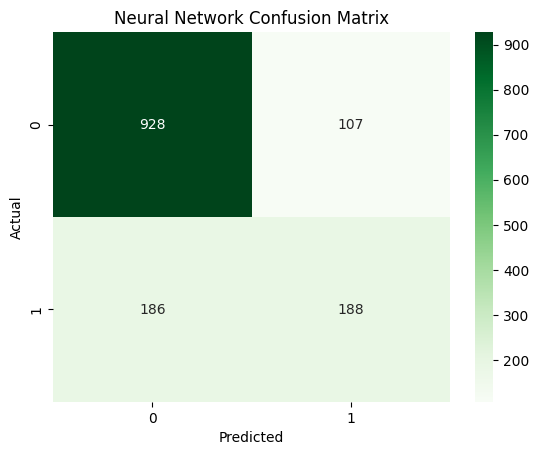

In [59]:
# Visualization: Neural Network Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Greens')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

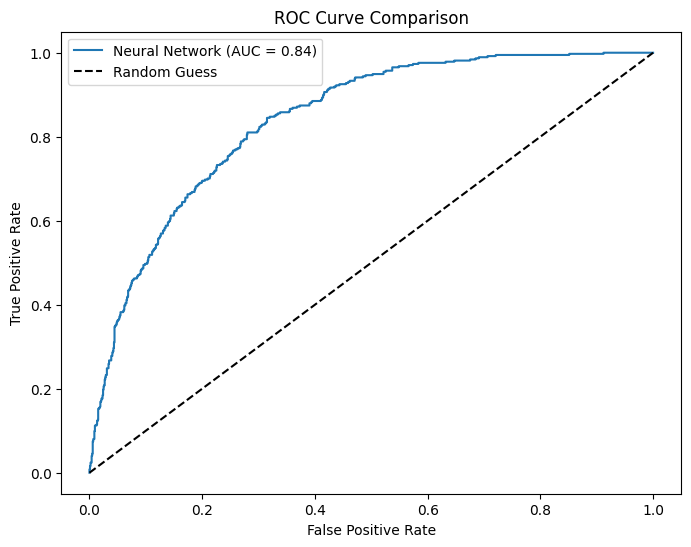

In [60]:
# Visualization: ROC Curve Comparison
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

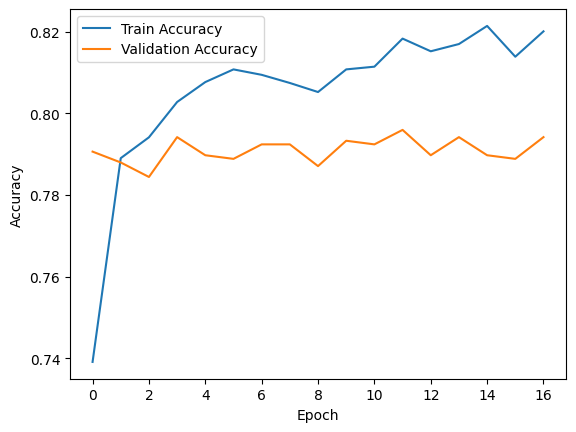

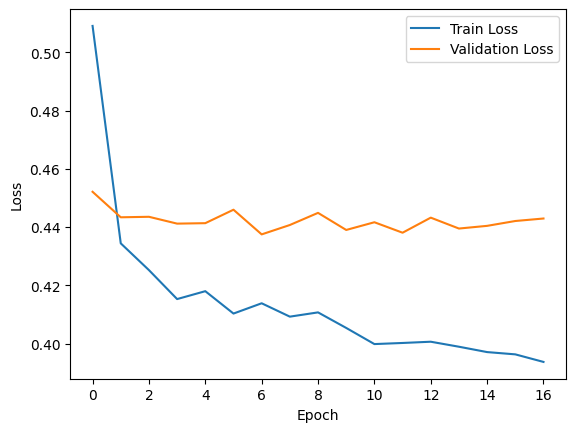

In [61]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Final Comparison**

In [62]:
# Final Comparison Table
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network'],
    'Accuracy': [acc_dt, acc_nn],
    'Accuracy (%)': [acc_dt*100, acc_nn*100],
    'ROC-AUC': [auc_dt, auc_nn],
    'ROC-AUC (%)': [auc_dt*100, auc_nn*100]
})
print("Final Comparison Summary:")
print(results_df)

Final Comparison Summary:
            Model  Accuracy  Accuracy (%)   ROC-AUC  ROC-AUC (%)
0   Decision Tree  0.799148     79.914833  0.829549    82.954868
1  Neural Network  0.792051     79.205110  0.839598    83.959803


# **Neural Network with keras-tuner**

In [63]:
# Define Model Builder for Keras Tuner

def build_model(hp):
    model = Sequential()

    # Input + first hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=128, max_value=512, step=64),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],)
    ))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    # Additional hidden layers
    for i in range(hp.Int('num_layers', 1, 4)):  # 1 to 4 extra layers
        model.add(Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dropout_{i+2}', 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Learning rate choice
    lr = hp.Choice('learning_rate', values=[1e-2, 5e-3, 1e-3, 5e-4, 1e-4])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [64]:
# Set up Keras Tuner (Bayesian Optimization)

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,                   # Try 20 different architectures
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='churn_tuner',
    overwrite=True                   # Set False if  want to resume a previous search
)

In [65]:
# Early stopping for each trial
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Starting hyperparameter search...")
tuner.search(
    X_train_scaled, y_train,
    epochs=150,
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weight_dict,
    verbose=1
)

Trial 20 Complete [00h 00m 16s]
val_accuracy: 0.7382431030273438

Best val_accuracy So Far: 0.7648624777793884
Total elapsed time: 00h 10m 37s


In [66]:
#  Get and display best model

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


Best Hyperparameters:
units_1: 256
dropout_1: 0.2
num_layers: 4
units_2: 96
dropout_2: 0.2
learning_rate: 0.005
units_3: 64
dropout_3: 0.30000000000000004
units_4: 32
dropout_4: 0.2
units_5: 96
dropout_5: 0.2


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 96)             │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │         3,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,337 (181.00 KB)

 Trainable params: 45,249 (176.75 KB)

 Non-trainable params: 1,088 (4.25 KB)

In [67]:
# Final Training on Full Training Set (optional re-train)

print("\nRetraining best model on full training data...")
history = best_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)],
    class_weight=class_weight_dict,
    verbose=1
)


Retraining best model on full training data...
Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7603 - loss: 0.4820 - val_accuracy: 0.7311 - val_loss: 0.5412
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7755 - loss: 0.4712 - val_accuracy: 0.7169 - val_loss: 0.5980
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7627 - loss: 0.4689 - val_accuracy: 0.7214 - val_loss: 0.5970
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7754 - loss: 0.4557 - val_accuracy: 0.7365 - val_loss: 0.5316
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7767 - loss: 0.4499 - val_accuracy: 0.7054 - val_loss: 0.6040
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7682 - loss: 0.4502 - val_accuracy: 0.7489 - val_loss: 0.4986
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7831 - loss: 0.4533 - val_accuracy: 0.7267 - val_loss: 0.5827
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy:

In [68]:
#  Final Evaluation

y_prob = best_model.predict(X_test_scaled).flatten()
y_pred = (y_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("\n" + "="*50)
print("FINAL TEST RESULTS (Best Model)")
print("="*50)
print(f"Accuracy : {acc:.4f} ({acc*100:.2f}%)")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

FINAL TEST RESULTS (Best Model)
Accuracy : 0.7708 (77.08%)
F1-Score : 0.6317
ROC-AUC  : 0.8357

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.78      0.83      1035
       Churn       0.55      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Confusion Matrix:
[[809 226]
 [ 97 277]]


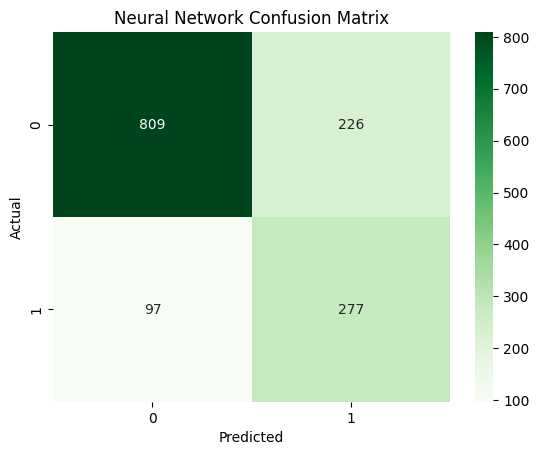

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [73]:
#Evaluate the model
loss,accuracy=best_model.evaluate(X_test,y_test)
print("Test Loss: ",loss)
print("Test Accuracy: ",accuracy)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 51.1518
Test Loss:  54.06428146362305
Test Accuracy:  0.7331440448760986
Test Accuracy: 0.7331 (73.31%)


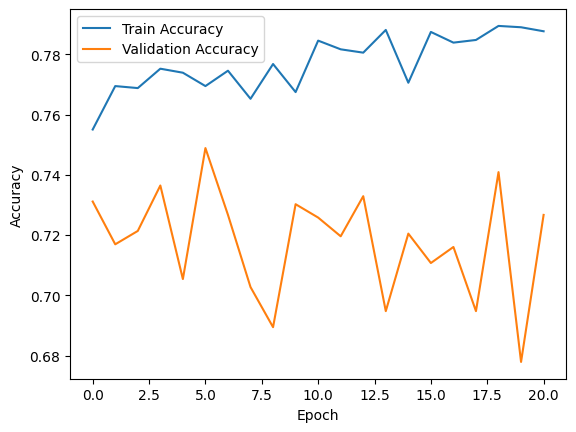

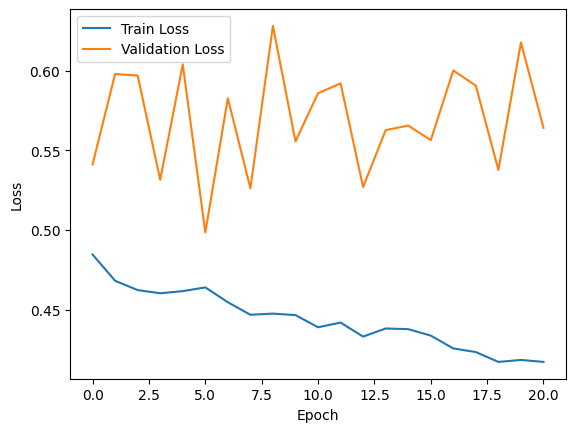

In [70]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()